In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("NIFTY50.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-11,10334.299805,10545.099609,10334.000000,10458.400391,10458.400391,1218500.0
1,2020-03-12,10039.950195,10040.750000,9508.000000,9590.150391,9590.150391,1343500.0
2,2020-03-13,9107.599609,10159.400391,8555.150391,9955.200195,9955.200195,1388000.0
3,2020-03-16,9587.799805,9602.200195,9165.099609,9197.400391,9197.400391,897700.0
4,2020-03-17,9285.400391,9403.799805,8915.599609,8967.049805,8967.049805,935600.0


In [4]:
df_close = df[['Date','Adj Close']]

In [5]:
df_close.columns = ['Date','y']

In [6]:
df_close['Date'] = pd.to_datetime(df_close['Date'])

In [7]:
df_close.sort_values(by='Date', inplace=True)

In [8]:
df_close.head(10)

,Date,y
0,2020-03-11,10458.400391
1,2020-03-12,9590.150391
2,2020-03-13,9955.200195
3,2020-03-16,9197.400391
4,2020-03-17,8967.049805
5,2020-03-18,8468.799805
6,2020-03-19,8263.450195
7,2020-03-20,8745.450195
8,2020-03-23,7610.250000
9,2020-03-24,7801.049805


In [9]:
window_size = 30
for i in range(window_size):
  df_close['y'+str(i+1)] = df_close['y'].shift(i+1)

In [12]:
df_close.head()

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30
0,2020-03-11,10458.400391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-12,9590.150391,10458.400391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-13,9955.200195,9590.150391,10458.400391,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-16,9197.400391,9955.200195,9590.150391,10458.400391,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-17,8967.049805,9197.400391,9955.200195,9590.150391,10458.400391,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_close.dropna(axis=0, inplace=True)

In [14]:
df_close.head()

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30
30,2020-04-28,9380.900391,9282.299805,9154.400391,9313.900391,9187.299805,8981.450195,9261.849609,9266.750000,8992.799805,...,7801.049805,7610.250000,8745.450195,8263.450195,8468.799805,8967.049805,9197.400391,9955.200195,9590.150391,10458.400391
31,2020-04-29,9553.349609,9380.900391,9282.299805,9154.400391,9313.900391,9187.299805,8981.450195,9261.849609,9266.750000,...,8317.849609,7801.049805,7610.250000,8745.450195,8263.450195,8468.799805,8967.049805,9197.400391,9955.200195,9590.150391
32,2020-04-30,9859.900391,9553.349609,9380.900391,9282.299805,9154.400391,9313.900391,9187.299805,8981.450195,9261.849609,...,8641.450195,8317.849609,7801.049805,7610.250000,8745.450195,8263.450195,8468.799805,8967.049805,9197.400391,9955.200195
33,2020-05-04,9293.500000,9859.900391,9553.349609,9380.900391,9282.299805,9154.400391,9313.900391,9187.299805,8981.450195,...,8660.250000,8641.450195,8317.849609,7801.049805,7610.250000,8745.450195,8263.450195,8468.799805,8967.049805,9197.400391
34,2020-05-05,9205.599609,9293.500000,9859.900391,9553.349609,9380.900391,9282.299805,9154.400391,9313.900391,9187.299805,...,8281.099609,8660.250000,8641.450195,8317.849609,7801.049805,7610.250000,8745.450195,8263.450195,8468.799805,8967.049805


In [15]:
df_train = df_close.head(df_close.shape[0]-10)
df_test = df_close.tail(10)

In [16]:
X_train = df_train.drop(['Date','y'],axis=1)
y_train = df_train['y']

X_test = df_test.drop(['Date','y'],axis=1)
y_test = df_test['y']


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

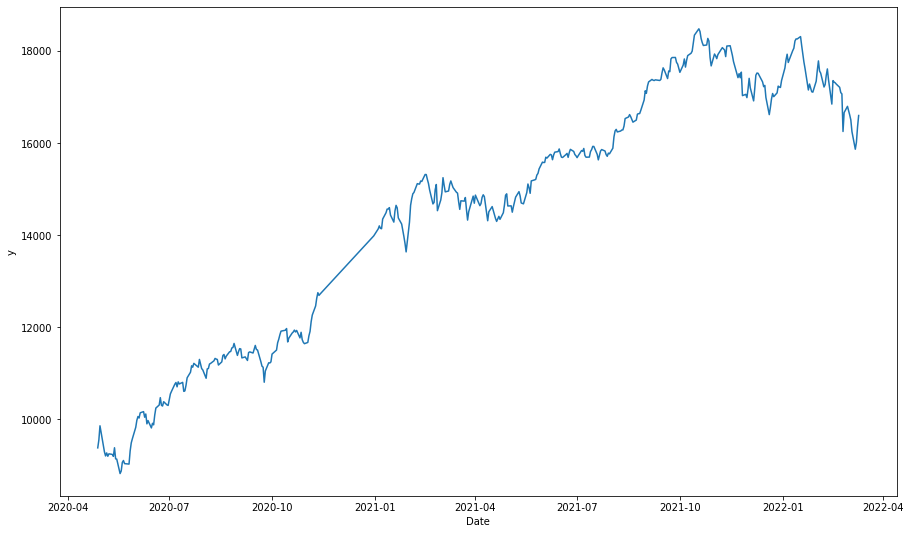

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,9))
sns.lineplot(data=df_close, x='Date',y='y')
plt.show()

In [19]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [20]:
X_train.shape

(427, 30)

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [22]:
X_test.shape

(10, 30, 1)

In [24]:
model = Sequential()

In [25]:
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(None,1)))

In [26]:
model.add(LSTM(64, activation = 'relu'))

In [27]:
model.add(Dense(1))

In [28]:
model.compile(optimizer='adam' , loss='huber' , metrics = 'mape')

In [29]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
14/14 [==============================] - 3s 69ms/step - loss: 14456.1670 - mape: 99.9961
Epoch 2/100
14/14 [==============================] - 1s 69ms/step - loss: 12389.7744 - mape: 86.0122
Epoch 3/100
14/14 [==============================] - 1s 70ms/step - loss: 8586.8906 - mape: 60.6899
Epoch 4/100
14/14 [==============================] - 1s 69ms/step - loss: 5580.2085 - mape: 41.3459
Epoch 5/100
14/14 [==============================] - 1s 70ms/step - loss: 2780.1541 - mape: 19.7828
Epoch 6/100
14/14 [==============================] - 1s 70ms/step - loss: 1193.7473 - mape: 9.0155
Epoch 7/100
14/14 [==============================] - 1s 70ms/step - loss: 1258.1855 - mape: 8.9308
Epoch 8/100
14/14 [==============================] - 1s 70ms/step - loss: 1337.3595 - mape: 9.3126
Epoch 9/100
14/14 [==============================] - 1s 69ms/step - loss: 535.3118 - mape: 4.0644
Epoch 10/100
14/14 [==============================] - 1s 70ms/step - loss: 401.9157 - mape: 3.0412
Epoc

In [30]:
pred = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_percentage_error

In [33]:
np.round(100 - mean_absolute_percentage_error(y_true = y_test, y_pred = pred)*100,2)

97.64

In [36]:
df_test

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30
488,2022-02-24,16247.950195,17063.250000,17092.199219,17206.650391,17276.300781,17304.599609,17322.199219,17352.449219,16842.800781,...,17277.949219,17149.099609,17617.150391,17757.000000,17938.400391,18113.050781,18308.099609,18255.750000,18257.800781,18212.349609
489,2022-02-25,16658.400391,16247.950195,17063.250000,17092.199219,17206.650391,17276.300781,17304.599609,17322.199219,17352.449219,...,17110.150391,17277.949219,17149.099609,17617.150391,17757.000000,17938.400391,18113.050781,18308.099609,18255.750000,18257.800781
490,2022-02-28,16793.900391,16658.400391,16247.950195,17063.250000,17092.199219,17206.650391,17276.300781,17304.599609,17322.199219,...,17101.949219,17110.150391,17277.949219,17149.099609,17617.150391,17757.000000,17938.400391,18113.050781,18308.099609,18255.750000
491,2022-03-02,16605.949219,16793.900391,16658.400391,16247.950195,17063.250000,17092.199219,17206.650391,17276.300781,17304.599609,...,17339.849609,17101.949219,17110.150391,17277.949219,17149.099609,17617.150391,17757.000000,17938.400391,18113.050781,18308.099609
492,2022-03-03,16498.050781,16605.949219,16793.900391,16658.400391,16247.950195,17063.250000,17092.199219,17206.650391,17276.300781,...,17576.849609,17339.849609,17101.949219,17110.150391,17277.949219,17149.099609,17617.150391,17757.000000,17938.400391,18113.050781
493,2022-03-04,16245.349609,16498.050781,16605.949219,16793.900391,16658.400391,16247.950195,17063.250000,17092.199219,17206.650391,...,17780.000000,17576.849609,17339.849609,17101.949219,17110.150391,17277.949219,17149.099609,17617.150391,17757.000000,17938.400391
494,2022-03-07,15863.150391,16245.349609,16498.050781,16605.949219,16793.900391,16658.400391,16247.950195,17063.250000,17092.199219,...,17560.199219,17780.000000,17576.849609,17339.849609,17101.949219,17110.150391,17277.949219,17149.099609,17617.150391,17757.000000
495,2022-03-08,16013.450195,15863.150391,16245.349609,16498.050781,16605.949219,16793.900391,16658.400391,16247.950195,17063.250000,...,17516.300781,17560.199219,17780.000000,17576.849609,17339.849609,17101.949219,17110.150391,17277.949219,17149.099609,17617.150391
496,2022-03-09,16345.349609,16013.450195,15863.150391,16245.349609,16498.050781,16605.949219,16793.900391,16658.400391,16247.950195,...,17213.599609,17516.300781,17560.199219,17780.000000,17576.849609,17339.849609,17101.949219,17110.150391,17277.949219,17149.099609
497,2022-03-10,16594.900391,16345.349609,16013.450195,15863.150391,16245.349609,16498.050781,16605.949219,16793.900391,16658.400391,...,17266.750000,17213.599609,17516.300781,17560.199219,17780.000000,17576.849609,17339.849609,17101.949219,17110.150391,17277.949219


In [37]:
y_test

488    16247.950195
489    16658.400391
490    16793.900391
491    16605.949219
492    16498.050781
493    16245.349609
494    15863.150391
495    16013.450195
496    16345.349609
497    16594.900391
Name: y, dtype: float64

In [38]:
df_output = df_test[['Date','y']]

In [39]:
df_output['Pred'] = pred

In [40]:
df_output

,Date,y,Pred
488,2022-02-24,16247.950195,17220.998047
489,2022-02-25,16658.400391,16951.646484
490,2022-02-28,16793.900391,16874.804688
491,2022-03-02,16605.949219,16858.369141
492,2022-03-03,16498.050781,16797.142578
493,2022-03-04,16245.349609,16728.121094
494,2022-03-07,15863.150391,16606.748047
495,2022-03-08,16013.450195,16408.451172
496,2022-03-09,16345.349609,16304.247070
497,2022-03-10,16594.900391,16326.367188


In [41]:
df_output['PercentError'] = df_output.apply(lambda x: np.abs(x['y'] - x['Pred'])/x['y'],axis=1)

In [43]:
df_output['PercentError'].mean()

0.023559432162463225

In [44]:
100-2.35595

97.64405

In [ ]:
# MAPE - > Average(Absolute(Actual - Predicted)/Actual)

In [ ]:
1,2,3,4,5 -> 6
2,3,4,5,6 -> 7

In [ ]:
[3,4,5,6,7] -> 8
[4,5,6,7,8] -> 9